__Framingham caronary heart disease study analysis__

_Analyzing_

Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset

In [2]:
print("""Legend
sex	sex (Female/Male)
AGE	Age in years
FRW	`Framingham relative weight` (pct.) at baseline (52-222)
SBP	systolic blood pressure at baseline mmHg (90-300)
DBP	diastolic blood pressure at baseline mmHg (50-160)
CHOL	cholesterol at baseline mg/100ml (96-430)
CIG	cigarettes per day at baseline (0-60)
disease	1 if coronary heart disease occured during the follow-up, 0 otherwise
""")
fram_dataset = pd.read_csv('framingham.csv')
fram_dataset.head()

Legend
sex	sex (Female/Male)
AGE	Age in years
FRW	`Framingham relative weight` (pct.) at baseline (52-222)
SBP	systolic blood pressure at baseline mmHg (90-300)
DBP	diastolic blood pressure at baseline mmHg (50-160)
CHOL	cholesterol at baseline mg/100ml (96-430)
CIG	cigarettes per day at baseline (0-60)
disease	1 if coronary heart disease occured during the follow-up, 0 otherwise



,AGE,FRW,SBP,DBP,CHOL,CIG,sex,disease
0,45,93.0,100,62,220,0.0,Female,0
1,48,93.0,108,70,340,0.0,Male,0
2,45,91.0,160,100,171,0.0,Female,0
3,50,110.0,110,70,224,0.0,Male,0
4,48,85.0,110,70,229,25.0,Male,0


The gender plot

<AxesSubplot:xlabel='sex', ylabel='count'>

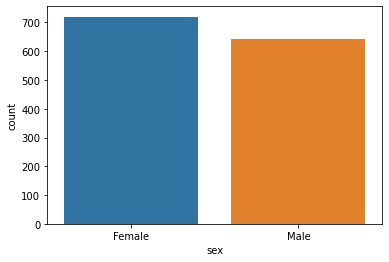

In [3]:
sns.countplot(x='sex', data=fram_dataset)

Result - there are slightly more females in the study than males

The cigaret/CHD plot

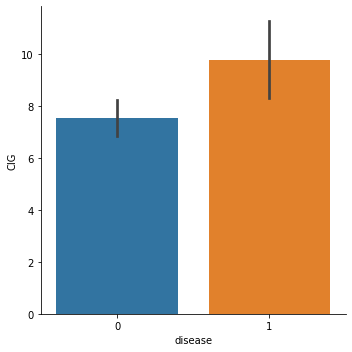

In [4]:
sns.catplot(x='disease', y='CIG', kind='bar', data=fram_dataset)

Result - there are more CHD patients among those who smoke more

The age/CHD plot

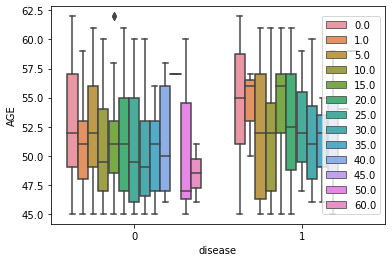

In [5]:
sns.boxplot(x='disease', y='AGE', hue='CIG', data=fram_dataset)
plt.legend(loc=7)

The chart is too crowded. Let's make it more readable by adding a column "smoker" that shows who is a smoker (smokes more than zero cigarettes a day)

In [6]:
fram_dataset['smoker'] = fram_dataset.apply(lambda row: 'smoker' if row["CIG"] > 0 else 'non-smoker', axis=1)
fram_dataset.head(10)


,AGE,FRW,SBP,DBP,CHOL,CIG,sex,disease,smoker
0,45,93.0,100,62,220,0.0,Female,0,non-smoker
1,48,93.0,108,70,340,0.0,Male,0,non-smoker
2,45,91.0,160,100,171,0.0,Female,0,non-smoker
3,50,110.0,110,70,224,0.0,Male,0,non-smoker
4,48,85.0,110,70,229,25.0,Male,0,smoker
5,55,101.0,134,84,224,0.0,Male,0,non-smoker
6,53,79.0,122,68,270,0.0,Female,0,non-smoker
7,45,110.0,138,88,260,0.0,Female,0,non-smoker
8,58,106.0,126,70,279,0.0,Female,1,non-smoker
9,48,99.0,134,84,259,1.0,Female,0,smoker


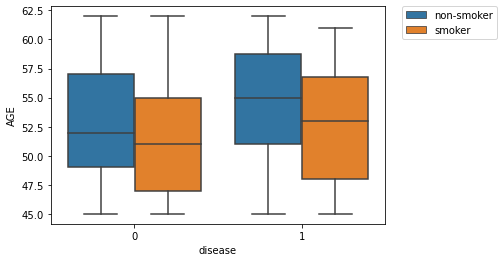

In [7]:
sns.boxplot(x='disease', y='AGE', hue='smoker', data=fram_dataset)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Result - the risk of getting CHD increases with age (boxes with disease=1 are higher than disease=0 counterparts). Moreover, smokers are more likely to develop CHD at a younger age than non-smokers (the meadian age of CHD smokers is lower than non-smokers').


The cholesterol levels/CHD chart

<AxesSubplot:xlabel='disease', ylabel='CHOL'>

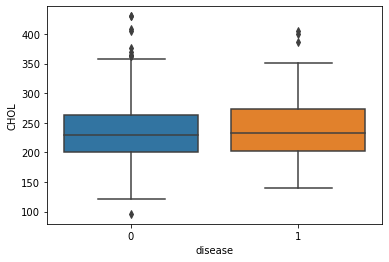

In [8]:
sns.boxplot(x='disease', y='CHOL', data=fram_dataset)

Result - medians in both groups are identical and overall difference in cholesterol levels between healthy and CHD patients is insignificant to take into account. Note: these cholesterol levels include both "good" and "bad" cholesterol with the latter being supposed to be linked with CHD

SBP/CHD and DBP/CHD charts

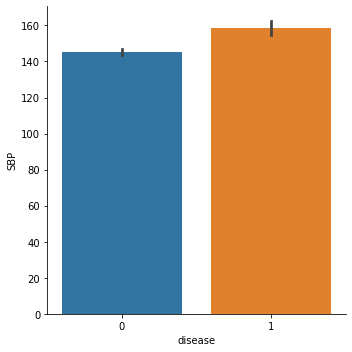

In [9]:
sns.catplot(x='disease', y='SBP', kind='bar', data=fram_dataset)

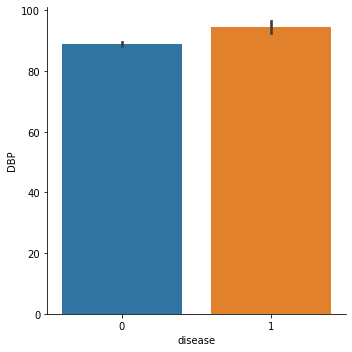

In [10]:
sns.catplot(x='disease', y='DBP', kind='bar', data=fram_dataset)

Result - blood pressure has correlation with CHD: those diagnosed with it have a higher blood pressure (both SBP and DBP)

Relative weight/CHD chart

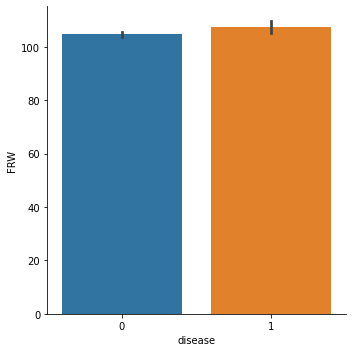

In [11]:
sns.catplot(x='disease', y='FRW', kind='bar', data=fram_dataset)

Result - CHD patients have a bit higher relative weght

Gender/CHD chart

_Prepartion for feeding_

In [12]:
# check for null values
fram_dataset.isnull().any()

AGE        False
FRW         True
SBP        False
DBP        False
CHOL       False
CIG         True
sex        False
disease    False
smoker     False
dtype: bool

There are some null values. They shall be filled with the mean of the corresponding column

In [13]:
fram_dataset = fram_dataset.fillna(value={'FRW': fram_dataset['FRW'].mean(), 'CIG': fram_dataset['CIG'].mean()})
print(fram_dataset)

      AGE    FRW  SBP  DBP  CHOL   CIG     sex  disease      smoker
0      45   93.0  100   62   220   0.0  Female        0  non-smoker
1      48   93.0  108   70   340   0.0    Male        0  non-smoker
2      45   91.0  160  100   171   0.0  Female        0  non-smoker
3      50  110.0  110   70   224   0.0    Male        0  non-smoker
4      48   85.0  110   70   229  25.0    Male        0      smoker
...   ...    ...  ...  ...   ...   ...     ...      ...         ...
1358   47  113.0  155  105   175   5.0    Male        1      smoker
1359   59   98.0  124   84   227  20.0    Male        1      smoker
1360   55  111.0  108   74   231   0.0  Female        0  non-smoker
1361   49  114.0  110   80   218  20.0    Male        0      smoker
1362   51   95.0  152   90   199   1.0  Female        0      smoker

[1363 rows x 9 columns]


In [14]:
fram_dataset.isnull().any()

AGE        False
FRW        False
SBP        False
DBP        False
CHOL       False
CIG        False
sex        False
disease    False
smoker     False
dtype: bool

Now it is time to calculate the baseline for the machine learning model

In [15]:
fram_dataset['disease'].value_counts()

0    1095
1     268
Name: disease, dtype: int64

In [16]:
baseline=1095/(1095+268)
baseline

0.8033749082905356

In [17]:
# changing string values to number values
fram_dataset['smoker'] = fram_dataset.apply(lambda row: 1 if row["CIG"] == 'smoker' else 0, axis=1)
fram_dataset['sex'] = fram_dataset.apply(lambda row: 1 if row["sex"] == 'Male' else 0, axis=1)

Importing libraries

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

Due to the imbalanced nature of the data set, undersampling and oversampling will be applied to increase the accuracy of the machine learning algorithm

In [19]:
X = fram_dataset.drop('disease',axis=1)
y = fram_dataset['disease']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.3)
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

Fitting the model

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

Predicting

In [21]:
result = pipeline.predict(X_test)

Evaluating

In [22]:
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       317
           1       0.79      0.94      0.86       340

    accuracy                           0.84       657
   macro avg       0.86      0.84      0.84       657
weighted avg       0.85      0.84      0.84       657



In [23]:
accuracy_score(y_test, result)

0.8417047184170472

Conclusion - the framingham data was analyzed and a machine learning model was built